#transformación de coordenadas

In [ ]:
% pip install pyproj

In [ ]:
from pyproj import Transformer
import numpy as np 
import pandas as pd 
# Un código simple para convertir de un sistemas de coordenadas geográficas a planas

# Reporte sismos servicio geologico, coordenadas geográficas
sismos = pd.read_excel('pozosepis.xlsx')
lats = np.asarray(sismos['WELL_X_COO'])
lons = np.asarray(sismos['WELL_Y_COO'])

transformer = Transformer.from_crs(3116,4326) # <- 4326 es WGS84 y 3116 es MAGNA-SIRGAS
puntos = list(zip(lats, lons))


nuevasCoordenadas = []
for pt in transformer.itransform(puntos): 
    nuevasCoordenadas.append(pt)

# mostrar las cuatro primeras coordenadas viejas y nuevas
print("Conversión de coordenadas geográficas a planas\n")
print("Planas (3116) \t -> \t  Geograficas (4326)\n")
for i in range(5):
    print(puntos[i], "\t\t", nuevasCoordenadas[i])

Conversión de coordenadas geográficas a planas

Planas (3116) 	 -> 	  Geograficas (4326)

(1068802.375, 1302264.5) 		 (5.212472742365201, -71.35203799032682)
(1034915.625, 1259405.75) 		 (4.907848182406411, -71.7393525448863)
(1296320.125, 911583.5) 		 (7.275029196901952, -74.87814437269724)
(1326291.98, 1260119.91) 		 (7.540398336366632, -71.72121012158433)
(1041853.9375, 1295462.25) 		 (4.969306375243649, -71.41432966574853)


In [ ]:
nc=pd.DataFrame(nuevasCoordenadas)

nc.rename(columns={0:'latitud',1:'longitud'},inplace=True)

nc.fillna(0)
nc


,latitud,longitud
0,5.212473,-71.352038
1,4.907848,-71.739353
2,7.275029,-74.878144
3,7.540398,-71.721210
4,4.969306,-71.414330
...,...,...
23605,3.394443,-75.539202
23606,4.761232,-71.632913
23607,5.909627,-66.993797
23608,4.165970,-72.627823


#Geopandas ell location plot


In [ ]:
% pip install geopandas

In [ ]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

In [ ]:
gdf = geopandas.GeoDataFrame(
    nc, geometry=geopandas.points_from_xy( nc.longitud,nc.latitud))

In [ ]:
print(gdf.head())

    latitud   longitud                   geometry
0  5.212473 -71.352038  POINT (-71.35204 5.21247)
1  4.907848 -71.739353  POINT (-71.73935 4.90785)
2  7.275029 -74.878144  POINT (-74.87814 7.27503)
3  7.540398 -71.721210  POINT (-71.72121 7.54040)
4  4.969306 -71.414330  POINT (-71.41433 4.96931)


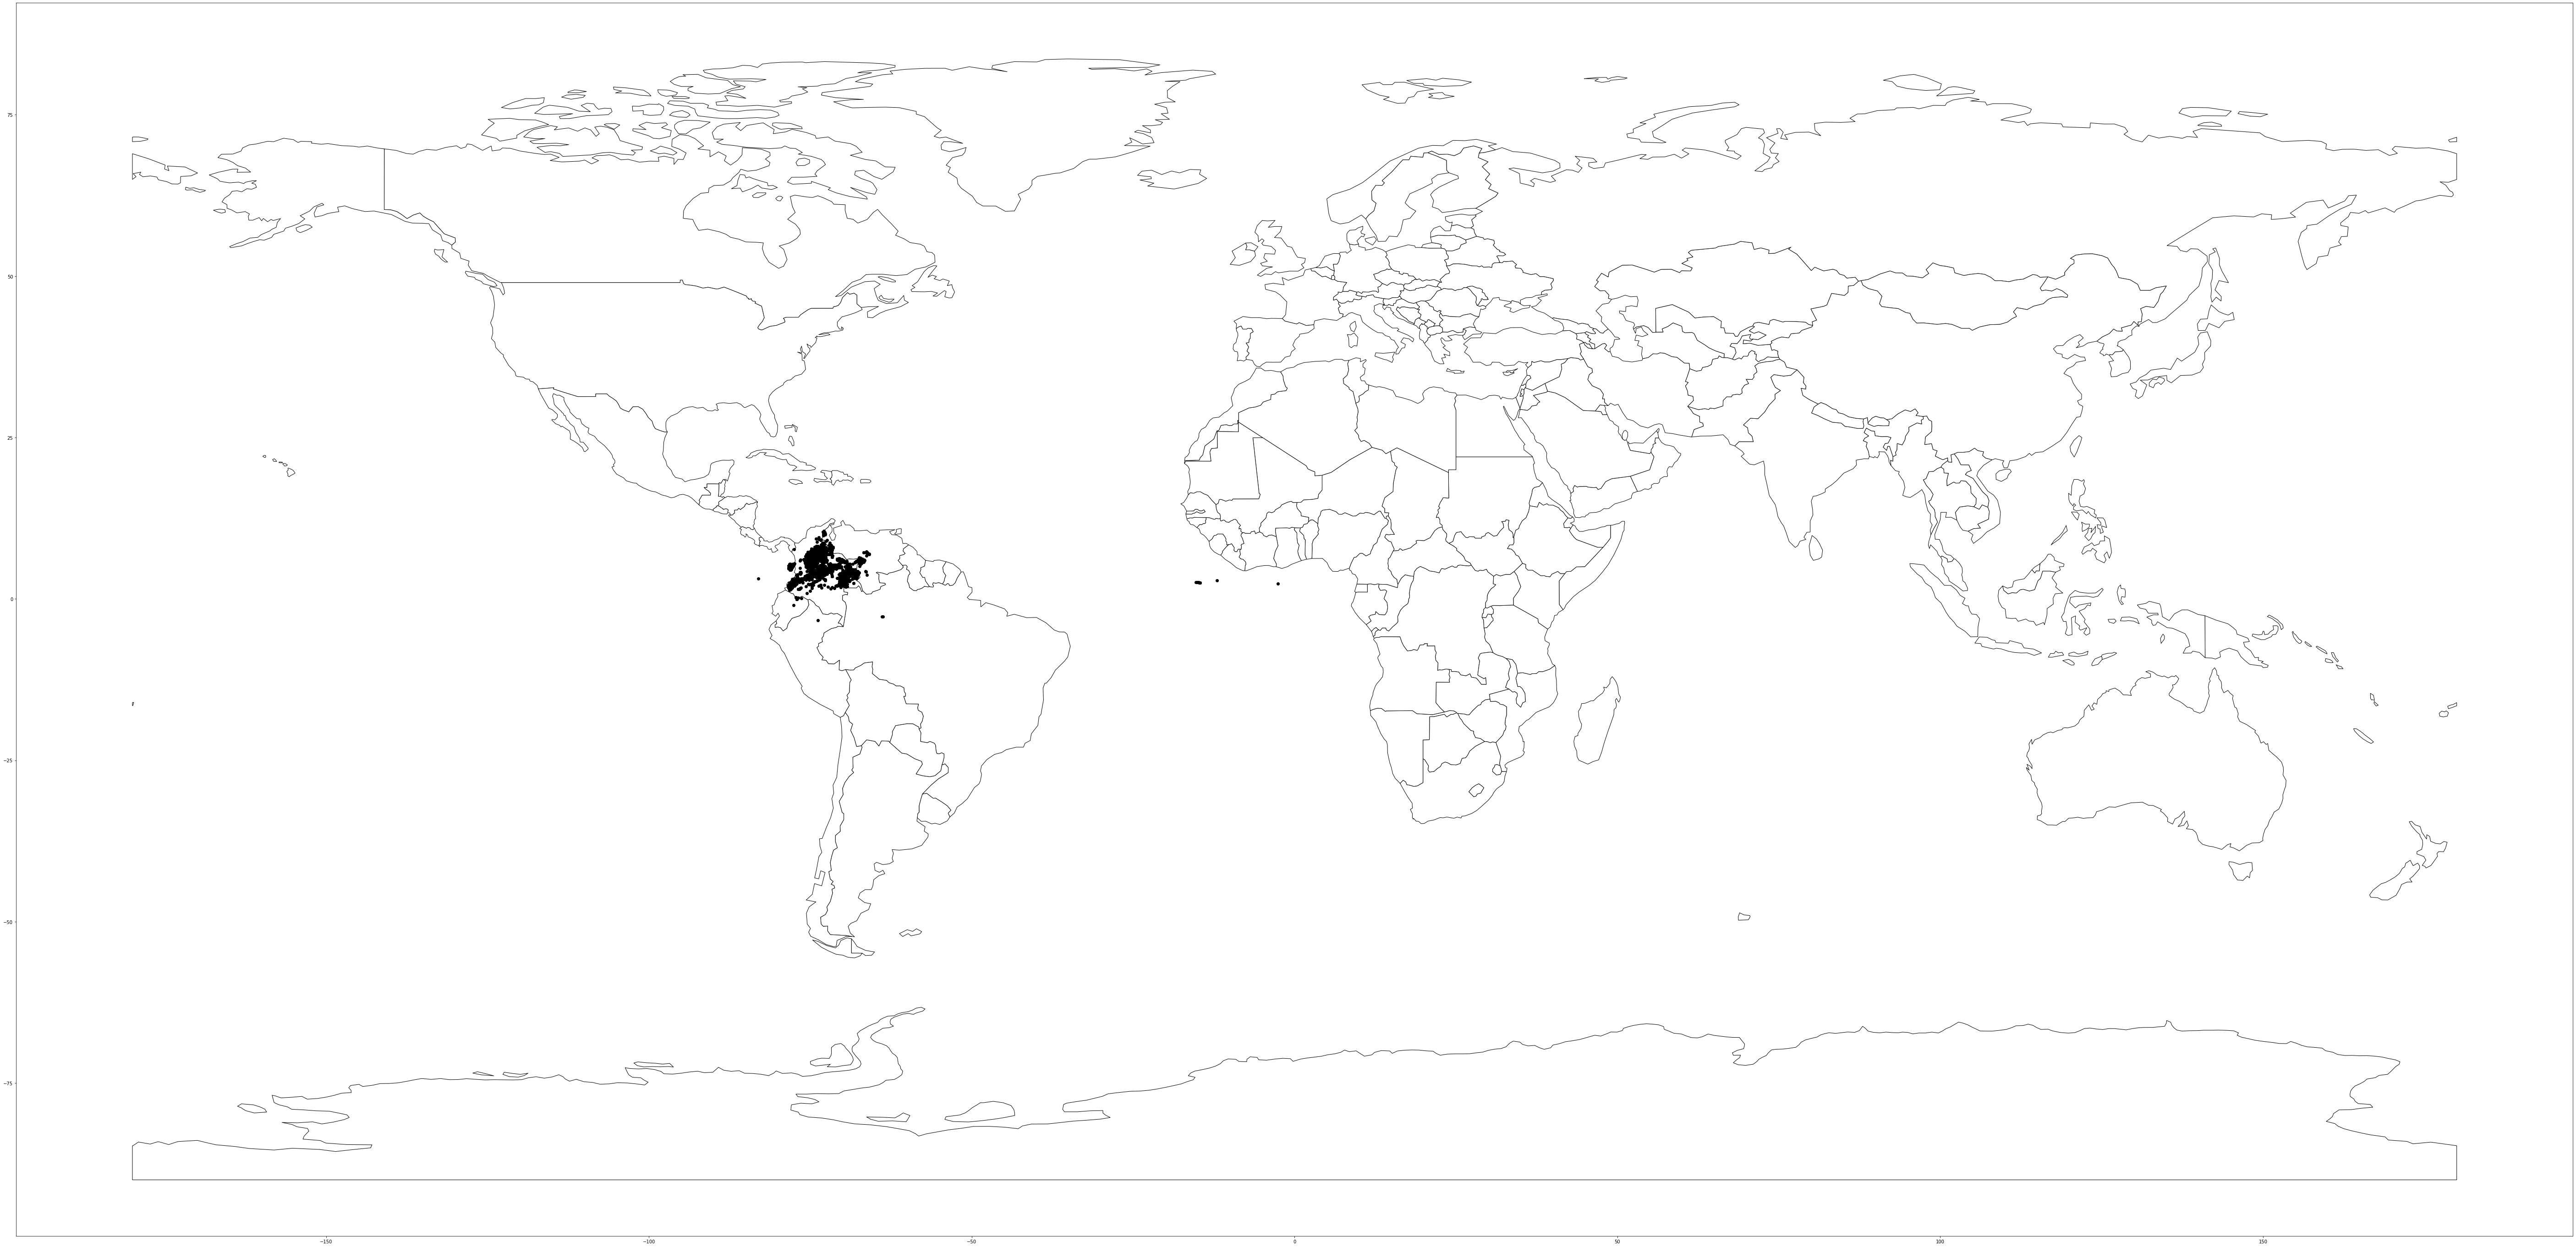

In [ ]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# se restringe a Colombia.
#ax = world[world.name == 'Colombia'].plot(
#    color='White',figsize=(100,100), edgecolor='black')

# Se restringe a World.
ax = world.plot(
    color='White',figsize=(100,100), edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='black')

plt.show()

